<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/Srimannarayana_Adapa/final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as p

In [33]:
df = pd.read_csv("all_season_details.csv", low_memory=False)

In [34]:
df.shape

(242550, 45)

In [35]:
df.head()

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,110,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"nice and full, angling and perhaps swinging in...",<p><strong>7.30pm</strong> Gaikwad and Conway ...,NaN
1,120,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Conway shuffles across off, and shimmies out a...",NaN,NaN
2,130,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"good length, angling in at off and then straig...",NaN,NaN
3,140,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shorter and slanting into middle and leg, Gaik...","<p>Rummy: ""Fast bowling options for CSK defini...",NaN
4,150,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Shami hits a heavy length and brings this back...,"<p>LG: ""Watching out for Hangargekar. He was i...",NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242550 entries, 0 to 242549
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   comment_id         242550 non-null  int64  
 1   season             242067 non-null  float64
 2   match_id           242550 non-null  int64  
 3   match_name         242550 non-null  object 
 4   home_team          242550 non-null  object 
 5   away_team          242550 non-null  object 
 6   current_innings    242550 non-null  object 
 7   innings_id         242550 non-null  int64  
 8   over               242550 non-null  int64  
 9   ball               242550 non-null  int64  
 10  runs               242550 non-null  int64  
 11  shortText          242550 non-null  object 
 12  isBoundary         242550 non-null  bool   
 13  isWide             242550 non-null  bool   
 14  isNoball           242550 non-null  bool   
 15  batsman1_id        242550 non-null  int64  
 16  ba

In [38]:
df = df.drop(columns=['comment_id','preText', 'postText','text'])

KeyError: "['comment_id', 'preText', 'postText', 'text'] not found in axis"

In [39]:
df.isnull()

,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,False
242546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,False
242547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,False
242548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,False


In [40]:
df.drop_duplicates(inplace=True)

In [41]:
df.describe()

,season,match_id,innings_id,over,ball,runs,batsman1_id,batsman1_runs,batsman1_balls,bowler1_id,...,batsman2_runs,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls
count,242066.000000,2.425490e+05,242549.000000,242549.000000,242549.000000,242549.000000,2.425490e+05,242549.000000,242549.000000,2.425490e+05,...,242549.000000,242549.000000,2.297090e+05,229709.000000,229709.000000,229709.000000,229709.000000,1.188000e+04,11880.000000,11880.000000
mean,2015.588017,8.701749e+05,1.483247,10.161716,3.483886,1.317899,2.503055e+05,18.047698,14.119873,3.158598e+05,...,16.551686,13.219288,3.151650e+05,2.198914,0.024483,16.235019,0.551868,2.635273e+05,18.815404,15.311869
std,4.639491,3.530664e+05,0.499720,5.658034,1.707447,1.612824,2.968812e+05,18.341554,11.905876,3.217494e+05,...,17.771904,11.892062,3.222056e+05,1.046243,0.155527,10.171336,0.773715,3.039915e+05,19.542348,12.695239
min,2008.000000,3.359820e+05,1.000000,1.000000,1.000000,0.000000,4.292000e+03,0.000000,0.000000,4.508000e+03,...,0.000000,0.000000,4.508000e+03,0.100000,0.000000,0.000000,0.000000,4.292000e+03,0.000000,0.000000
25%,2012.000000,5.483150e+05,1.000000,5.000000,2.000000,0.000000,3.296600e+04,4.000000,5.000000,3.401900e+04,...,3.000000,4.000000,3.333500e+04,1.000000,0.000000,8.000000,0.000000,3.314100e+04,4.000000,5.000000
50%,2015.000000,8.298190e+05,1.000000,10.000000,3.000000,1.000000,5.291200e+04,12.000000,11.000000,2.691700e+05,...,11.000000,10.000000,2.655640e+05,2.000000,0.000000,14.000000,0.000000,2.118540e+05,12.000000,12.000000
75%,2020.000000,1.216506e+06,2.000000,15.000000,5.000000,1.000000,3.791430e+05,27.000000,20.000000,4.752810e+05,...,25.000000,20.000000,4.752810e+05,3.000000,0.000000,23.000000,1.000000,3.984390e+05,28.000000,22.000000
max,2023.000000,1.370353e+06,2.000000,20.000000,7.000000,7.000000,1.349361e+06,174.000000,73.000000,1.350792e+06,...,174.000000,73.000000,1.350792e+06,4.000000,2.000000,70.000000,5.000000,1.312645e+06,129.000000,69.000000


In [42]:
df.groupby(['season'])['match_id'].nunique().sum()

1021

# EDA_Visualization

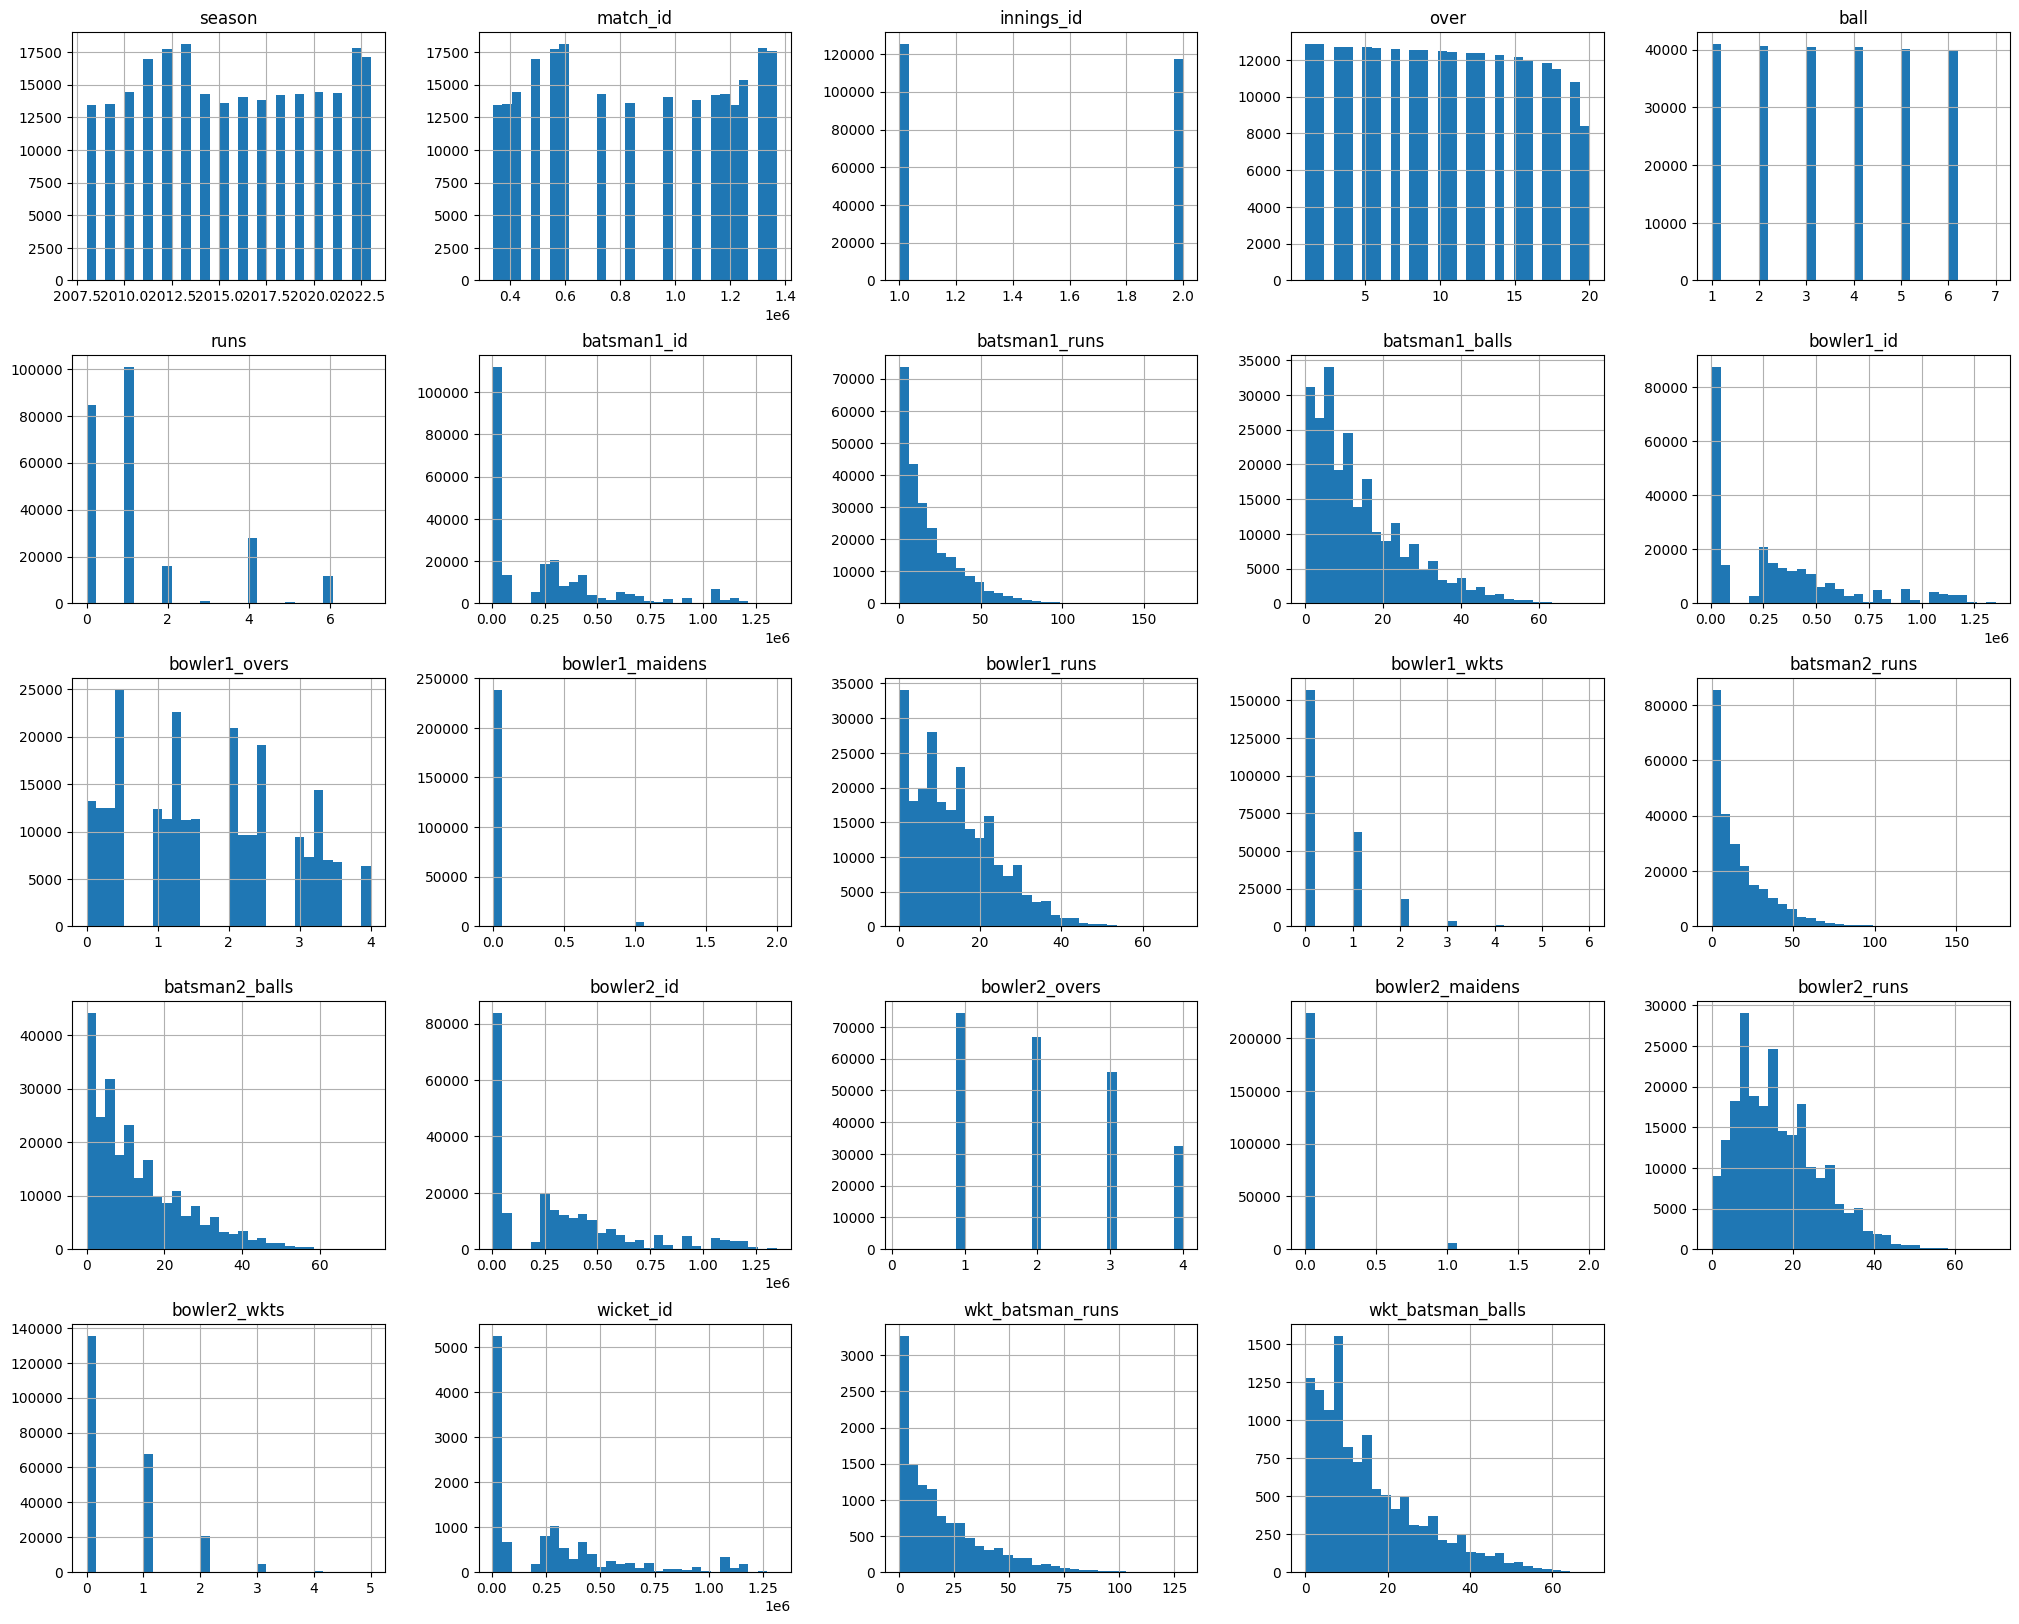

In [43]:
df.hist(bins=30, figsize=(25, 20))
plt.show()

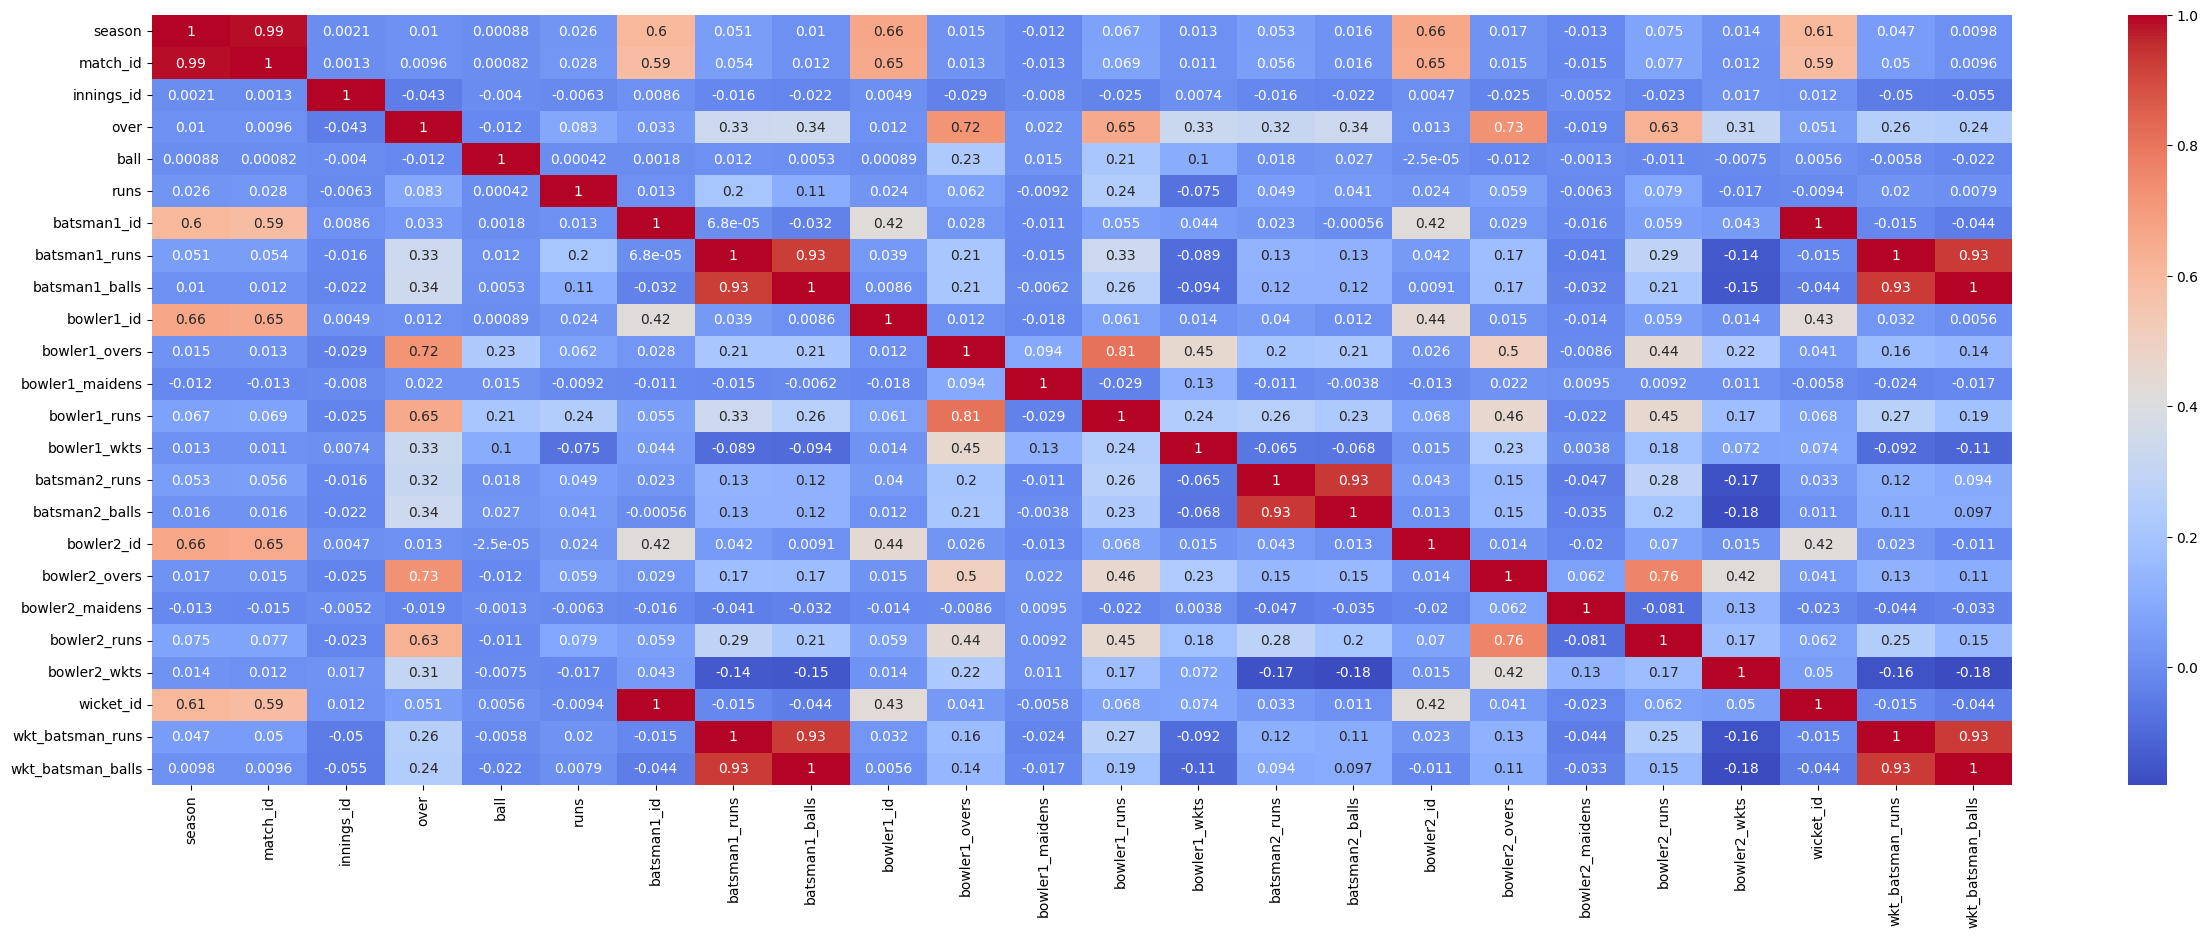

In [44]:
plt.figure(figsize=(30, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.show()

    season  match_id
0   2013.0        76
1   2012.0        74
2   2022.0        74
3   2011.0        73
4   2023.0        71
5   2010.0        60
6   2014.0        60
7   2016.0        60
8   2018.0        60
9   2019.0        60
10  2020.0        60
11  2021.0        60
12  2015.0        59
13  2017.0        59
14  2008.0        58
15  2009.0        57


<ipython-input-45-9110ab29f578>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bargraph = sns.barplot(


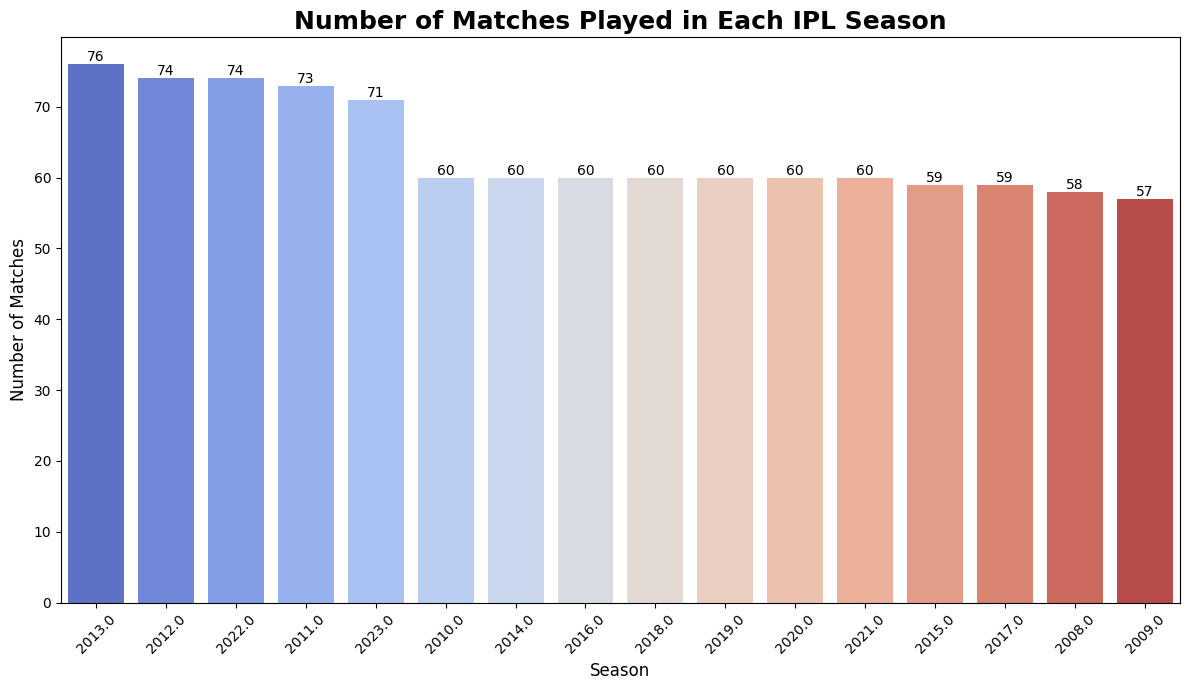

In [45]:
matches_per_season = (df.groupby('season')['match_id'].nunique().sort_values(ascending=False).reset_index())
print(matches_per_season)
plt.figure(figsize=(12, 7))
palette = sns.color_palette('coolwarm', n_colors=len(matches_per_season))
bargraph = sns.barplot(
    x='season',
    y='match_id',
    data=matches_per_season,
    palette=palette,
    order=matches_per_season['season']
)

for bar in bargraph.patches:
    bargraph.annotate(
        text=f"{int(bar.get_height())}",
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.title('Number of Matches Played in Each IPL Season', fontsize=18, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


In [46]:
top_batsmen = df.groupby('batsman1_name')['batsman1_runs'].sum().nlargest(10).reset_index()
print(top_batsmen)
fig = p.bar(
    top_batsmen,
    x='batsman1_name',  # Batsman names on the x-axis
    y='batsman1_runs',  # Runs on the y-axis
    labels={'batsman1_name': 'Batsman', 'batsman1_runs': 'Runs'},
    title="Top 10 Batsmen by Runs",
    color_discrete_sequence=["#FF5733"]  # Orange color
)

fig.update_xaxes(title="Batsman", tickangle=45)
fig.update_yaxes(title="Runs",tickformat=",.0f" )
fig.update_layout(
    title_font_size=18,
    title_font_color='black',
    title_font_family="Arial",
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    plot_bgcolor='rgba(0,0,0,0)',
    bargap=0.2
)

fig.show()

    batsman1_name  batsman1_runs
0     Virat Kohli         133423
1    David Warner         126924
2  Shikhar Dhawan         126135
3    Rohit Sharma          97967
4     Chris Gayle          94477
5    Suresh Raina          86088
6        KL Rahul          85826
7  Ajinkya Rahane          80968
8  Gautam Gambhir          79674
9  AB de Villiers          76932


In [47]:
import plotly.graph_objects as go
wickets_per_bowler = df.groupby('bowler1_name')['wicket_id'].count().reset_index()
wickets_per_bowler = wickets_per_bowler.sort_values(by='wicket_id', ascending=False).head(10)
print(wickets_per_bowler)
fig = go.Figure(data=[go.Bar(
    x=wickets_per_bowler['wicket_id'],
    y=wickets_per_bowler['bowler1_name'],
    orientation='h',
    marker_color='#FFA15A'
)])

fig.update_layout(
    title_text='Top 10 Bowlers by Wickets Taken',
    xaxis_title='Number of Wickets',
    yaxis_title='Bowler Name',
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    plot_bgcolor='rgba(0,0,0,0)',
    bargap=0.2
)

fig.show()

            bowler1_name  wicket_id
134         Dwayne Bravo        200
502     Yuzvendra Chahal        194
357  Ravichandran Ashwin        188
325        Piyush Chawla        188
236       Lasith Malinga        186
445         Sunil Narine        182
32           Amit Mishra        182
76     Bhuvneshwar Kumar        182
153      Harbhajan Singh        161
358      Ravindra Jadeja        160


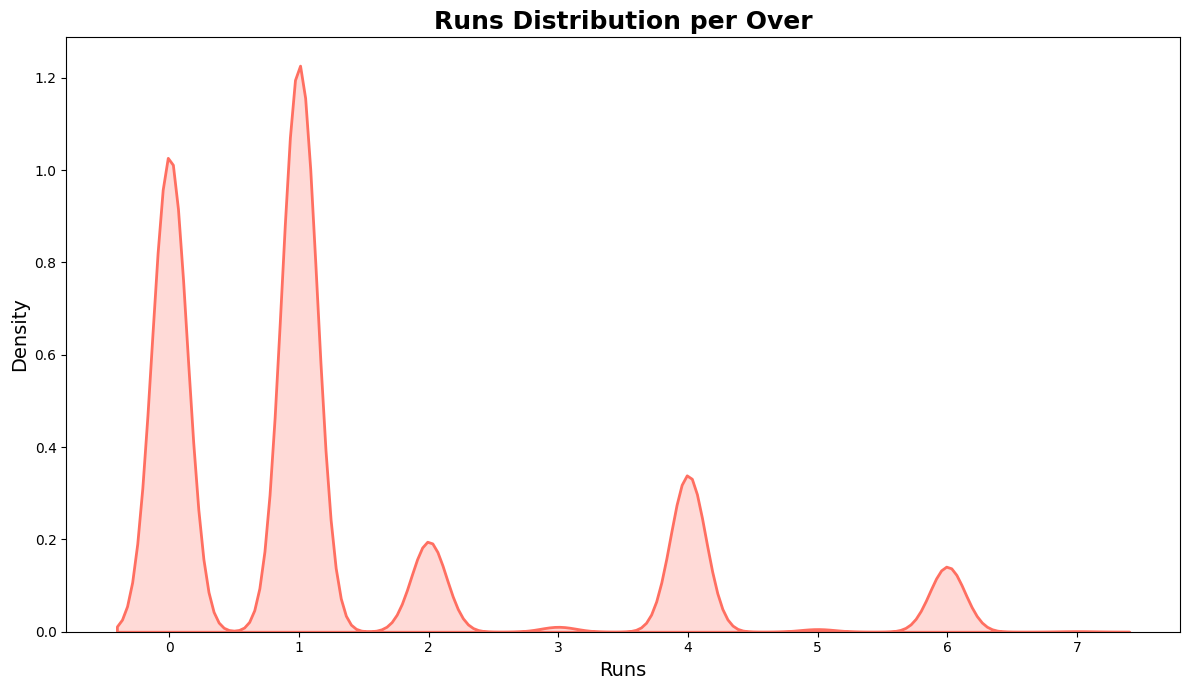

In [48]:
plt.figure(figsize=(12, 7))

# Create KDE plot with a new color
sns.kdeplot(df['runs'], fill=True, color='#FF6F61', linewidth=2)

# Add titles and labels
plt.title("Runs Distribution per Over", fontsize=18, fontweight='bold')
plt.xlabel("Runs", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

    season  wicket_id
0   2013.0        903
1   2022.0        887
2   2023.0        869
3   2012.0        850
4   2011.0        804
5   2018.0        715
6   2010.0        708
7   2021.0        708
8   2017.0        705
9   2009.0        687
10  2008.0        683
11  2015.0        677
12  2019.0        675
13  2014.0        664
14  2016.0        663
15  2020.0        661



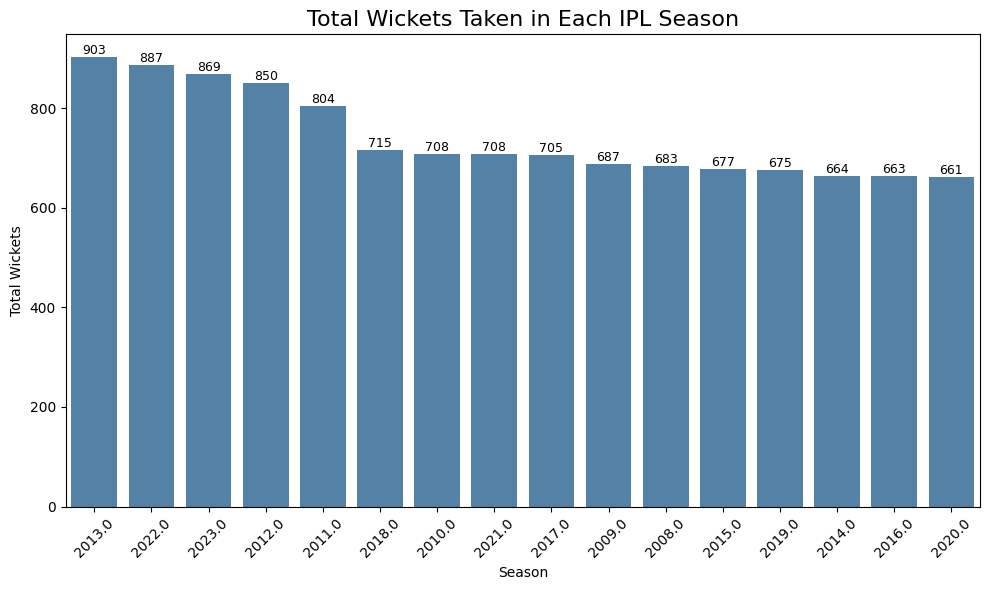

In [49]:
wickets_per_season = df.groupby(['season'])['wicket_id'].count().sort_values(ascending=False).reset_index()
print(wickets_per_season)
print()
plt.figure(figsize=(10, 6))
bargraph = sns.barplot(x='season', y='wicket_id', data=wickets_per_season,
                       order=wickets_per_season['season'], color='steelblue')

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )
plt.title('Total Wickets Taken in Each IPL Season', fontsize=16)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Total Wickets', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
import plotly.graph_objects as go
top_home_teams = df.groupby('home_team')['runs'].sum().sort_values(ascending=False).reset_index()
print(top_home_teams)
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_home_teams['runs'],
    y=top_home_teams['home_team'],
    orientation='h',
    name='Total Runs',
    marker_color='#66B3FF'
))
fig.update_layout(
    title="Home Teams by Total Runs Scored",
    xaxis_title="Total Runs",
    yaxis_title="Home Team",
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    plot_bgcolor='rgba(0,0,0,0)',
    bargap=0.1,
    bargroupgap=0.1,
    showlegend=False
)
fig.show()


   home_team   runs
0        CSK  38452
1        RCB  38285
2         DC  38057
3         MI  37828
4        SRH  37371
5        KKR  34903
6         RR  30118
7       KXIP  29635
8       PBKS   6577
9        PWI   6436
10        GT   6237
11        GL   4930
12       LSG   4600
13       RPS   4313
14     Kochi   1913


In [51]:
fig = p.bar(
    df['isBoundary'].value_counts(),
    x=df['isBoundary'].value_counts().index,
    y=df['isBoundary'].value_counts().values,
    labels={'x': 'Boundary Status', 'y': 'Count'},
    title='Boundary vs Non-Boundary Balls',
    color=df['isBoundary'].value_counts().index,
    color_discrete_sequence=p.colors.qualitative.Pastel
)
fig.update_layout(
    xaxis_title="Boundary Status",
    yaxis_title="Count",
    title_font_size=18,
    xaxis_tickmode='array',
    xaxis_tickvals=[0, 1],
    xaxis_ticktext=["Non-Boundary", "Boundary"],
    plot_bgcolor='rgba(0,0,0,0)',
    bargap=0.2
)
fig.show()

# EDA_Basic_Statistics

In [52]:
home_matches = df.groupby('home_team')['match_id'].nunique()
away_matches = df.groupby('away_team')['match_id'].nunique()

total_matches = home_matches.add(away_matches, fill_value=0)

total_matches = total_matches.sort_values(ascending=False)

print(total_matches)

home_team
MI       247
SRH      241
RCB      240
DC       238
KKR      237
CSK      223
RR       206
KXIP     190
PWI       46
PBKS      42
GT        33
GL        30
RPS       30
LSG       29
Kochi     14
Name: match_id, dtype: int64


In [53]:
fig = p.bar(
    x=total_matches.index,
    y=total_matches.values,
    labels={'x': 'Home Team', 'y': 'Number of Home Matches'},
    title='Number of Home Matches by Team',
)

fig.update_layout(
    xaxis_title="Home Team",
    yaxis_title="Number of Matches",
    title_font_size=18,
    plot_bgcolor='rgba(0,0,0,0)',
    bargap=0.2
)

fig.show()

In [54]:
df.groupby('batsman1_name')['runs'].sum().sort_values(ascending=False).head(10)

,runs
batsman1_name,
Virat Kohli,7513
Shikhar Dhawan,6948
David Warner,6722
Rohit Sharma,6414
Suresh Raina,5762
AB de Villiers,5312
Chris Gayle,5296
MS Dhoni,5245
Robin Uthappa,5237


In [55]:
batsmen_per_balls=df.groupby('batsman1_name')['ball'].count().sort_values(ascending=False).head(10)
print(batsmen_per_balls)

batsman1_name
Virat Kohli       5726
Shikhar Dhawan    5353
Rohit Sharma      4880
David Warner      4713
Suresh Raina      4170
Robin Uthappa     3921
MS Dhoni          3829
Ajinkya Rahane    3653
Gautam Gambhir    3524
Chris Gayle       3498
Name: ball, dtype: int64


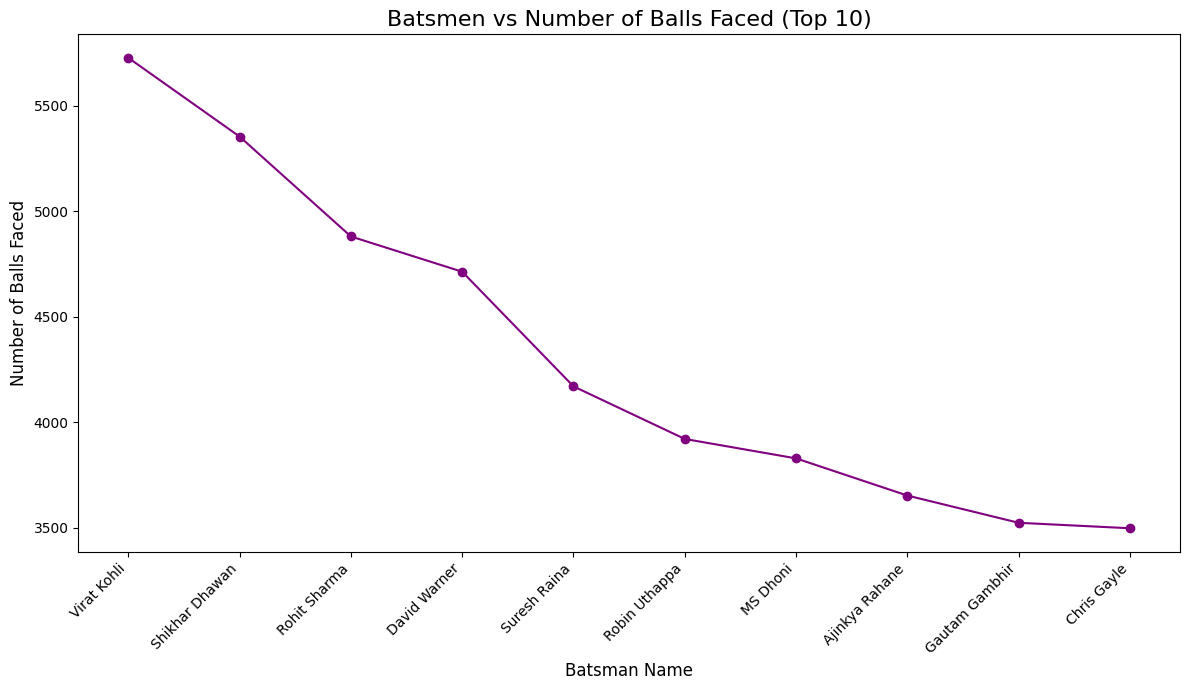

In [56]:
plt.figure(figsize=(12, 7))
plt.scatter(batsmen_per_balls.index, batsmen_per_balls.values, color='purple', marker='o')
plt.plot(batsmen_per_balls.index, batsmen_per_balls.values, color='purple')
plt.title('Batsmen vs Number of Balls Faced (Top 10)', fontsize=16)
plt.xlabel('Batsman Name', fontsize=12)
plt.ylabel('Number of Balls Faced', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [57]:
boundaries_per_batsman = df.groupby('batsman1_name')['isBoundary'].sum().reset_index()
boundaries_per_batsman = boundaries_per_batsman.sort_values(by='isBoundary', ascending=False).head(10)
print(boundaries_per_batsman)

      batsman1_name  isBoundary
520  Shikhar Dhawan         896
612     Virat Kohli         876
148    David Warner         872
469    Rohit Sharma         808
122     Chris Gayle         760
561    Suresh Raina         708
465   Robin Uthappa         662
0    AB de Villiers         661
311        MS Dhoni         575
166  Dinesh Karthik         575


In [58]:
fig = p.bar(boundaries_per_batsman,x='batsman1_name',y='isBoundary',
    labels={'batsman1_name': 'Batsman', 'isBoundary': 'Number of Boundaries'},
    title='Top 10 Batsmen with Most Boundaries',)

fig.update_layout(
    xaxis_title="Batsman",
    yaxis_title="Number of Boundaries",
    title_font_size=18,
    plot_bgcolor='rgba(0,0,0,0)',
    bargap=0.2)

fig.show()

In [59]:
runs_per_season = df.groupby('season')['runs'].sum().reset_index()
print(runs_per_season)

    season   runs
0   2008.0  17875
1   2009.0  16243
2   2010.0  18726
3   2011.0  21087
4   2012.0  22357
5   2013.0  22463
6   2014.0  18827
7   2015.0  18211
8   2016.0  18798
9   2017.0  18698
10  2018.0  19781
11  2019.0  19343
12  2020.0  19244
13  2021.0  18508
14  2022.0  24184
15  2023.0  24533


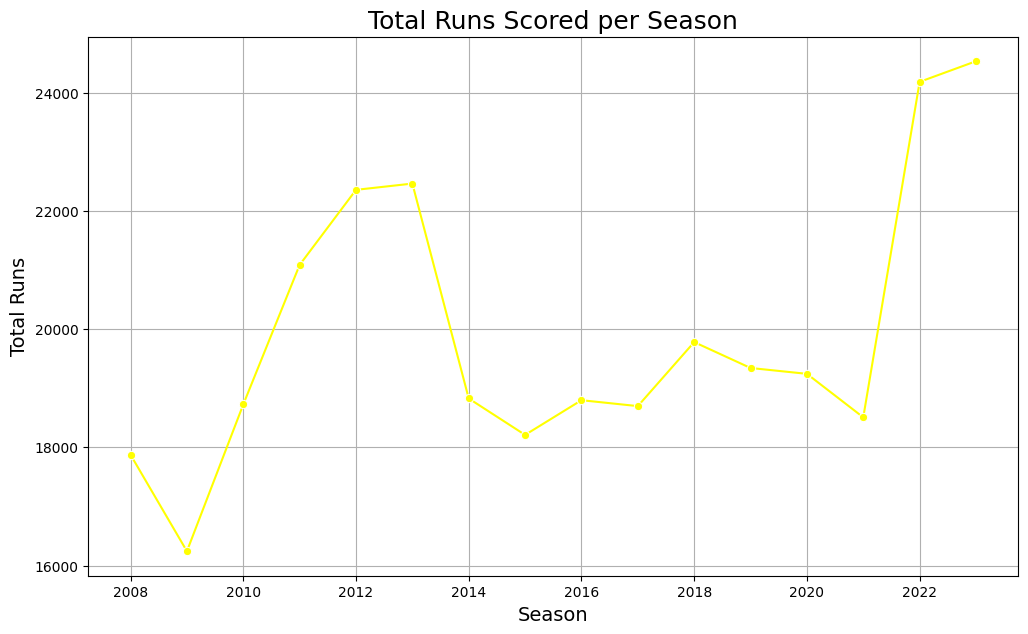

In [60]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='season', y='runs', data=runs_per_season, marker='o', color='yellow')
plt.title('Total Runs Scored per Season', fontsize=18)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.grid(True)
plt.show()

In [61]:
partnership_df = df[['batsman1_name', 'batsman2_name', 'runs']]

partnership_runs = partnership_df.groupby(['batsman1_name', 'batsman2_name'])['runs'].sum().reset_index()

top_partnership = partnership_runs.sort_values('runs', ascending=False)
top_partnership.head(10)


,batsman1_name,batsman2_name,runs
64,AB de Villiers,Virat Kohli,1617
1427,Chris Gayle,Virat Kohli,1607
8056,Virat Kohli,AB de Villiers,1506
1822,David Warner,Shikhar Dhawan,1420
8069,Virat Kohli,Chris Gayle,1180
6154,Robin Uthappa,Gautam Gambhir,1077
7017,Shikhar Dhawan,David Warner,937
1403,Chris Gayle,KL Rahul,909
4433,Mayank Agarwal,KL Rahul,905
2381,Gautam Gambhir,Robin Uthappa,829


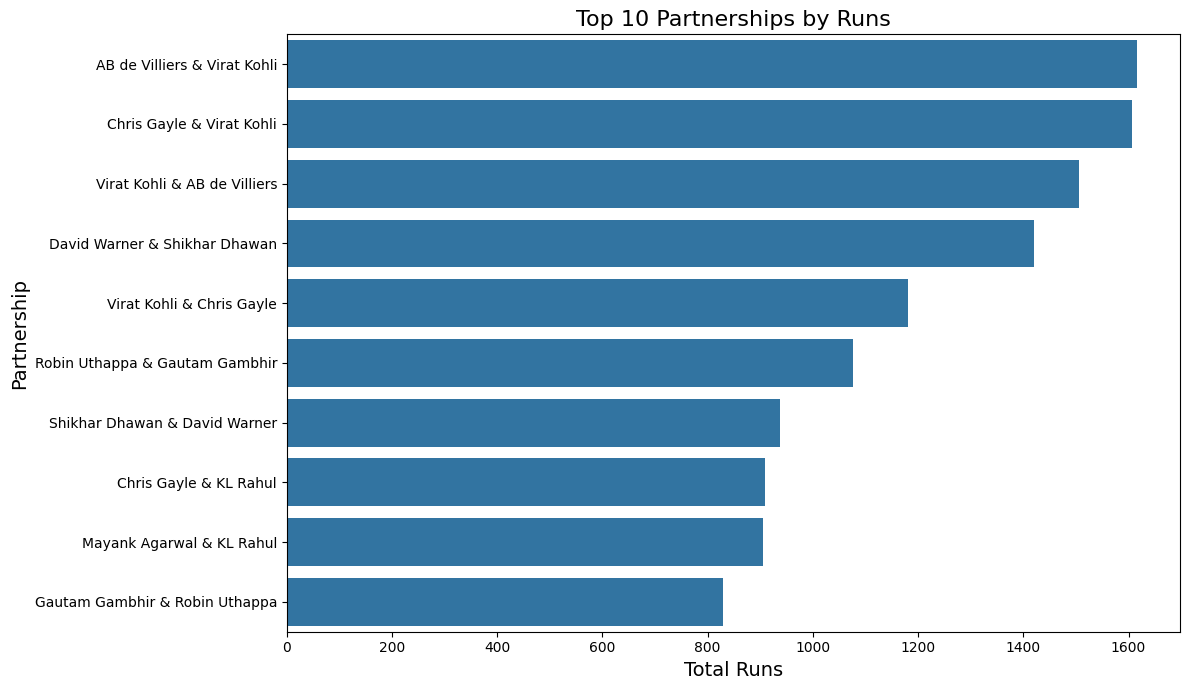

In [62]:
top_partnership['partnership'] = top_partnership['batsman1_name'] + ' & ' + top_partnership['batsman2_name']

plt.figure(figsize=(12, 7))
sns.barplot(x='runs', y='partnership', data=top_partnership.head(10), orient='h')
plt.title('Top 10 Partnerships by Runs', fontsize=16)
plt.xlabel('Total Runs', fontsize=14)
plt.ylabel('Partnership', fontsize=14)
plt.tight_layout()
plt.show()

In [63]:
bowler_economy = df.groupby('bowler1_name')['runs'].sum() / (df.groupby('bowler1_name')['ball'].count() / 6)
bowler_economy = bowler_economy.sort_values()
top_bowler_economy = bowler_economy.head(10)
top_bowler_economy

,0
bowler1_name,
Adam Gilchrist,0.000000
Nathu Singh,4.320000
Sachin Baby,4.800000
Ajinkya Rahane,5.000000
Shrikant Mundhe,5.142857
Lee Carseldine,5.142857
Dominic Thornely,5.454545
Ayush Badoni,5.538462
Matthew Short,6.000000


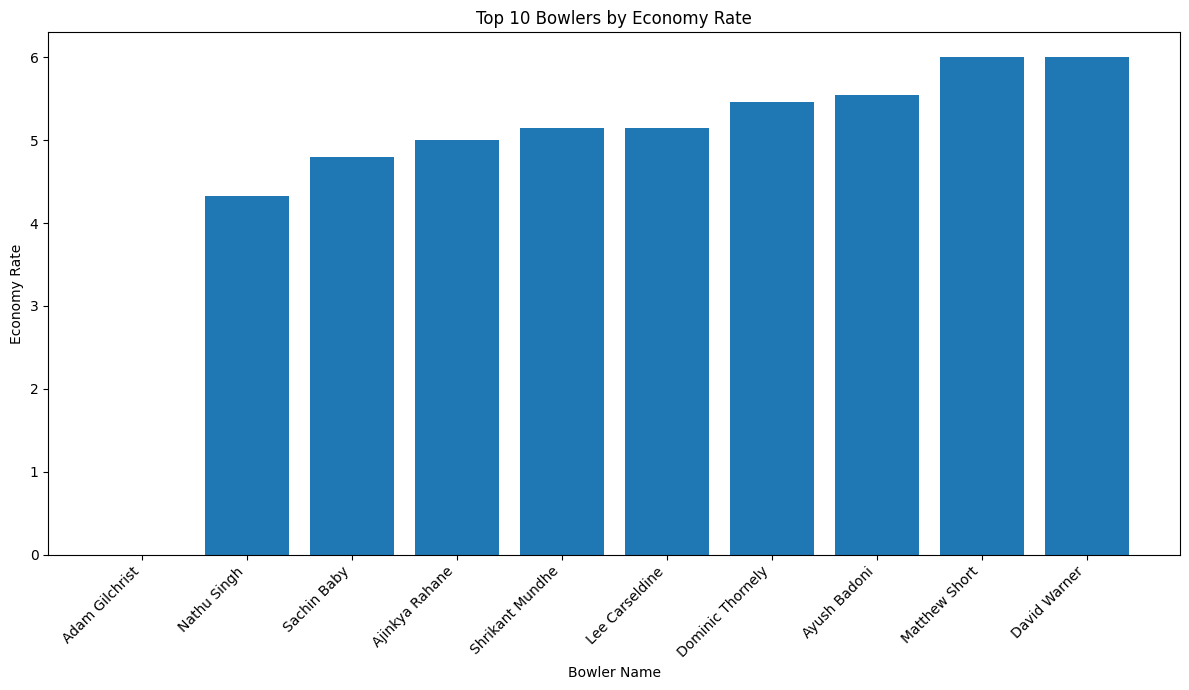

In [64]:
plt.figure(figsize=(12, 7))
plt.bar(top_bowler_economy.index, top_bowler_economy.values)
plt.xlabel("Bowler Name")
plt.ylabel("Economy Rate")
plt.title("Top 10 Bowlers by Economy Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [65]:
df[['match_id','innings_id','batsman1_name','batsman1_runs']][df['batsman1_runs']>= 10]

,match_id,innings_id,batsman1_name,batsman1_runs
9,1359475,1,Ruturaj Gaikwad,10
11,1359475,1,Ruturaj Gaikwad,11
12,1359475,1,Ruturaj Gaikwad,12
18,1359475,1,Ruturaj Gaikwad,18
19,1359475,1,Ruturaj Gaikwad,22
...,...,...,...,...
242527,336040,2,Yusuf Pathan,53
242528,336040,2,Yusuf Pathan,54
242529,336040,2,Mohammad Kaif,12
242532,336040,2,Yusuf Pathan,55


In [66]:
df['season'].value_counts()

,count
season,
2013.0,18115
2022.0,17768
2012.0,17719
2023.0,17128
2011.0,16964
2020.0,14449
2010.0,14409
2021.0,14350
2019.0,14265


In [67]:
wickets_per_bowler = df.groupby('bowler1_name')['wicket_id'].count().reset_index()
wickets_per_bowler = wickets_per_bowler.sort_values(by='wicket_id', ascending=False).head(10)
print(wickets_per_bowler)

            bowler1_name  wicket_id
134         Dwayne Bravo        200
502     Yuzvendra Chahal        194
357  Ravichandran Ashwin        188
325        Piyush Chawla        188
236       Lasith Malinga        186
445         Sunil Narine        182
32           Amit Mishra        182
76     Bhuvneshwar Kumar        182
153      Harbhajan Singh        161
358      Ravindra Jadeja        160


In [68]:
df.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text',
       'isRetiredHurt'],
      dtype='object')

In [69]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 season                  483
batsman2_name             2
bowler2_id            12840
bowler2_name          12840
bowler2_overs         12840
bowler2_maidens       12840
bowler2_runs          12840
bowler2_wkts          12840
wicket_id            230669
wkt_batsman_name     230669
wkt_bowler_name      230669
wkt_batsman_runs     230669
wkt_batsman_balls    230669
wkt_text             230669
dtype: int64


# Data_Cleaning

In [70]:
print(df['batsman1_name'].unique())

['Devon Conway' 'Ruturaj Gaikwad' 'Moeen Ali' 'Ben Stokes' 'Ambati Rayudu'
 'Shivam Dube' 'Ravindra Jadeja' 'MS Dhoni' 'Mitchell Santner'
 'Wriddhiman Saha' 'Shubman Gill' 'Sai Sudharsan' 'Hardik Pandya'
 'Vijay Shankar' 'Rahul Tewatia' 'Rashid Khan' 'Prabhsimran Singh'
 'Shikhar Dhawan' 'Bhanuka Rajapaksa' 'Jitesh Sharma' 'Sikandar Raza'
 'Sam Curran' 'M Shahrukh Khan' 'Mandeep Singh' 'Rahmanullah Gurbaz'
 'Anukul Roy' 'Venkatesh Iyer' 'Nitish Rana' 'Rinku Singh' 'Andre Russell'
 'Shardul Thakur' 'Sunil Narine' 'KL Rahul' 'Kyle Mayers' 'Deepak Hooda'
 'Krunal Pandya' 'Marcus Stoinis' 'Nicholas Pooran' 'Ayush Badoni'
 'Krishnappa Gowtham' 'Prithvi Shaw' 'David Warner' 'Mitchell Marsh'
 'Sarfaraz Khan' 'Rilee Rossouw' 'Rovman Powell' 'Aman Hakim Khan'
 'Axar Patel' 'Kuldeep Yadav' 'Chetan Sakariya' 'Yashasvi Jaiswal'
 'Jos Buttler' 'Sanju Samson' 'Devdutt Padikkal' 'Riyan Parag'
 'Shimron Hetmyer' 'Ravichandran Ashwin' 'Abhishek Sharma'
 'Rahul Tripathi' 'Harry Brook' 'Mayank Agarwal' '

In [71]:
df = df.drop_duplicates()
df.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text',
       'isRetiredHurt'],
      dtype='object')

In [72]:
match_details_df = df[['season', 'match_id','current_innings', 'over', 'ball','wkt_batsman_runs', 'isRetiredHurt']].copy()

match_details_df['wkt_batsman_runs'] = match_details_df['wkt_batsman_runs'].fillna(0)

# Feature_Engineering

In [73]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['batsman1_name_encoded'] = label_encoder.fit_transform(df['batsman1_name'])

In [74]:
df = pd.get_dummies(df, columns=['home_team', 'away_team'], drop_first=True)

In [75]:
df['total_runs_batsman'] = df.groupby(['match_id', 'batsman1_name'])['batsman1_runs'].transform('sum')
df['total_wickets_bowler'] = df.groupby(['match_id', 'bowler1_name'])['wicket_id'].transform('sum')
df['boundaries_per_over'] = df.groupby(['match_id', 'over'])['isBoundary'].transform('sum')
df['partnership_runs'] = df.groupby(['match_id', 'batsman1_name', 'batsman2_name'])['runs'].transform('sum')
df['batsman_strike_rate'] = (df['batsman1_runs'] / df['ball']) * 100
df['overs_bowled'] = df['over'] + (df['ball'] / 6)
df['powerplay'] = df['over'] < 6
df['cumulative_runs'] = df.groupby(['match_id', 'innings_id'])['runs'].cumsum()
df['run_rate'] = df['cumulative_runs'] / df['overs_bowled']
df['wickets_lost'] = df.groupby(['match_id', 'current_innings'])['wkt_batsman_runs'].apply(lambda x: (x > 0).cumsum()).reset_index(drop=True)

In [76]:
df['net_run_rate'] = df['run_rate'] - df.groupby(['match_id', 'current_innings'])['run_rate'].shift(1)
df['bowler_economy_rate'] = df.groupby(['match_id', 'bowler1_name'])['runs'].transform('sum') / df.groupby(['match_id', 'bowler1_name'])['over'].transform('count')
df['batsman1_form'] = df.groupby('batsman1_name')['batsman1_runs'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
df['bowler1_form'] = df.groupby('bowler1_name')['total_wickets_bowler'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
df['powerplay_run_rate'] = df[df['over'] < 6].groupby(['match_id', 'innings_id'])['runs'].transform('mean')
df['death_over_run_rate'] = df[df['over'] >= 16].groupby(['match_id', 'innings_id'])['runs'].transform('mean')

In [77]:
X = df[['overs_bowled', 'wickets_lost', 'run_rate', 'powerplay']]
Y = df['cumulative_runs']

X['powerplay'] = X['powerplay'].astype(int)

<ipython-input-77-9e5b5fa577a8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['overs_bowled', 'wickets_lost', 'run_rate']
for feature in numerical_features:
    if feature not in df.columns:
        print(f"Warning: Feature '{feature}' not found in DataFrame. Skipping scaling.")
        numerical_features.remove(feature)
if numerical_features:
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
else:
    print("Warning: None of the specified numerical features were found in the DataFrame. No scaling performed.")

# Model_Baseline

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [80]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe = RFE(RandomForestRegressor(), n_features_to_select=10)
rfe.fit(X, Y)
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:291: UserWarning:

Found n_features_to_select=10 > n_features=4. There will be no feature selection and all features will be kept.



Selected Features: Index(['overs_bowled', 'wickets_lost', 'run_rate', 'powerplay'], dtype='object')


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
rf_model_simple = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42,min_samples_leaf=1,min_samples_split=2)
rf_model_simple.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [102]:
Y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(Y_test, Y_pred_rf)
rf_r2 = r2_score(Y_test, Y_pred_rf)
print("\nRandom Forest Regression:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")


Random Forest Regression:
Mean Squared Error: 0.008437868480725624
R-squared: 0.9999963815201991


In [99]:
linear_model = LinearRegression()
X_train = X_train.dropna()
Y_train = Y_train[X_train.index]
linear_model.fit(X_train, Y_train)
Y_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(Y_test, Y_pred_linear)
linear_r2 = r2_score(Y_test, Y_pred_linear)
print("Linear Regression - Baseline Model:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R-squared: {linear_r2}")

Linear Regression - Baseline Model:
Mean Squared Error: 116.83938487129808
R-squared: 0.9498948158452242


In [103]:
print("\nPerformance Comparison:")
print(f"Linear Regression MSE: {linear_mse}, R²: {linear_r2}")
print(f"Random Forest MSE: {rf_mse}, R²: {rf_r2}")


Performance Comparison:
Linear Regression MSE: 116.83938487129808, R²: 0.9498948158452242
Random Forest MSE: 0.008437868480725624, R²: 0.9999963815201991


# Modeling

In [84]:
new_data = pd.DataFrame({
    'overs_bowled': [10.2],   # Example: 10 overs and 2 balls bowled
    'wickets_lost': [2],      # Example: 2 wickets lost
    'run_rate': [7.5],        # Example: current run rate is 7.5
    'powerplay': [45]          # Example: not in powerplay (after 6 overs)
})

# Predict total runs for this scenario
predicted_runs = rf_model_simple.predict(new_data)
print(f"Predicted Cumulative Runs: {predicted_runs[0]}")

Predicted Cumulative Runs: 66.48


In [85]:
from sklearn.metrics import mean_squared_error, r2_score
Y_pred = rf_model_simple.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.00826740414347557
R-squared: 0.999996454621808


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
linear_model = LinearRegression()
linear_model.fit(X_train_imputed, Y_train)
y_pred_linear = linear_model.predict(X_test_imputed)
print("Linear Regression R^2:", r2_score(Y_test, y_pred_linear))
print("Linear Regression MSE:", mean_squared_error(Y_test, y_pred_linear))

Linear Regression R^2: 0.949894820378663
Linear Regression MSE: 116.83937429985299


In [87]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree R^2:", r2_score(Y_test, y_pred_tree))
print("Decision Tree MSE:", mean_squared_error(Y_test, y_pred_tree))

Decision Tree R^2: 0.9999867927401173
Decision Tree MSE: 0.03079777365491651


In [88]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import xgboost as xgb

def evaluate_models(models, X_train, X_test, Y_train, Y_test):
    results = {}
    for model_name, model in models.items():
        X_train_cleaned = X_train.dropna()
        Y_train_cleaned = Y_train[X_train_cleaned.index]
        X_test_cleaned = X_test.dropna()
        Y_test_cleaned = Y_test[X_test_cleaned.index]
        model.fit(X_train_cleaned, Y_train_cleaned)
        Y_pred = model.predict(X_test_cleaned)
        mse = mean_squared_error(Y_test_cleaned, Y_pred)
        r2 = r2_score(Y_test_cleaned, Y_pred)
        rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
        mae = mean_absolute_error(Y_test, Y_pred)
        results[model_name] = {"MSE": mse,"RMSE":rmse,"R²": r2,"MAE":mae,}

    return results
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": xgb.XGBRegressor()
}
results = evaluate_models(models, X_train, X_test, Y_train, Y_test)
results_df = pd.DataFrame(results).T
print(results_df)

                          MSE       RMSE        R²       MAE
Linear Regression  116.839385  10.809227  0.949895  7.668706
Decision Tree        0.031045   0.176196  0.999987  0.012987
Random Forest        0.008340   0.091324  0.999996  0.008530
XGBoost              0.356833   0.597355  0.999847  0.387440


In [90]:
from sklearn.model_selection import cross_val_score
model_with_prevention = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
cv_scores = cross_val_score(model_with_prevention, X_train, Y_train, cv=5, scoring='r2')
print("Cross-validation R-squared scores:", cv_scores)
print("Average R-squared score across folds:", cv_scores.mean())

Cross-validation R-squared scores: [0.99999167 0.99999241 0.99999017 0.9999937  0.99999249]
Average R-squared score across folds: 0.9999920877731127


# Classification modeling and evaluation

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_classification = df[['batsman1_name_encoded', 'run_rate', 'powerplay', 'overs_bowled']]
Y_classification = df['isBoundary']

X_train_class, X_test_class, Y_train_class, Y_test_class = train_test_split(
    X_classification, Y_classification, test_size=0.2, random_state=42
)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, Y_train_class)

Y_pred_class = rf_classifier.predict(X_test_class)

accuracy = accuracy_score(Y_test_class, Y_pred_class)
print(f"Accuracy: {accuracy}")
print(classification_report(Y_test_class, Y_pred_class))

Accuracy: 0.7949907235621522
              precision    recall  f1-score   support

       False       0.84      0.93      0.88     40645
        True       0.23      0.11      0.15      7865

    accuracy                           0.79     48510
   macro avg       0.54      0.52      0.52     48510
weighted avg       0.74      0.79      0.76     48510



# Hyperparameter Tuning

In [92]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}
random_search_reg = RandomizedSearchCV(rf_regressor, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
random_search_reg.fit(X_train, Y_train)
best_rf_regressor = random_search_reg.best_estimator_

Y_pred_reg = best_rf_regressor.predict(X_test)
print("Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}")
print(f"R-squared: {r2_score(Y_test, Y_pred)}")

X_class = df[['batsman1_name_encoded', 'run_rate', 'powerplay', 'overs_bowled']]
Y_class = df['isBoundary']
X_train_class, X_test_class, Y_train_class, Y_test_class = train_test_split(X_class, Y_class, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}
random_search_class = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
random_search_class.fit(X_train_class, Y_train_class)
best_rf_classifier = random_search_class.best_estimator_


Y_pred_class = best_rf_classifier.predict(X_test_class)
print("\nClassification Results:")
print(f"Accuracy: {accuracy_score(Y_test_class, Y_pred_class)}")
print(classification_report(Y_test_class, Y_pred_class))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Regression Results:
Mean Squared Error: 0.00826740414347557
R-squared: 0.999996454621808
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.




Classification Results:
Accuracy: 0.838857967429396
              precision    recall  f1-score   support

       False       0.84      1.00      0.91     40645
        True       0.64      0.01      0.03      7865

    accuracy                           0.84     48510
   macro avg       0.74      0.51      0.47     48510
weighted avg       0.81      0.84      0.77     48510



In [112]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, max_depth=10))  # Tuned hyperparameters
])

In [114]:
pipeline.fit(X_train, Y_train)
predictions = pipeline.predict(X_test)
print(f"predictions: {predictions}")
print(f"predictions.shape: {predictions.shape}")
mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error: {mse}")

predictions: [45.41805139 31.45815012  0.         ... 13.85775471 92.2097517
 50.99334105]
predictions.shape: (48510,)
Mean Squared Error: 0.3222982480904077


In [113]:
print(X_train.head())
print(X_test.head())

        overs_bowled  wickets_lost  run_rate  powerplay
199033     12.666667           2.0  5.289474          0
237647     17.166667           0.0  8.563107          0
10462       1.833333           1.0  2.727273          1
39476       8.666667           6.0  7.961538          0
137929      9.333333           4.0  6.000000          0
        overs_bowled  wickets_lost  run_rate  powerplay
122567     10.833333           0.0  4.153846          0
147657      5.333333           1.0  5.812500          1
27100       1.166667           6.0  0.000000          1
42494       2.833333           0.0  0.705882          1
154360     19.166667           2.0  5.843478          0


In [93]:
# Regression Model
Y_train_pred = best_rf_regressor.predict(X_train)  # Predictions on training data
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
print("Regression Model - Training Set:")
print(f"Mean Squared Error: {train_mse}")
print(f"R-squared: {train_r2}")

# Classification Model
Y_train_pred_class = best_rf_classifier.predict(X_train_class)
train_accuracy = accuracy_score(Y_train_class, Y_train_pred_class)
print("\nClassification Model - Training Set:")
print(f"Accuracy: {train_accuracy}")
print(classification_report(Y_train_class, Y_train_pred_class))

Regression Model - Training Set:
Mean Squared Error: 0.002324499176079885
R-squared: 0.9999990028556736

Classification Model - Training Set:
Accuracy: 0.8410474183025062
              precision    recall  f1-score   support

       False       0.84      1.00      0.91    162718
        True       0.85      0.02      0.04     31321

    accuracy                           0.84    194039
   macro avg       0.84      0.51      0.47    194039
weighted avg       0.84      0.84      0.77    194039



In [94]:
# Regression Model - Test Set Evaluation
Y_test_pred = best_rf_regressor.predict(X_test)  # Predictions on test data
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)
print("\nRegression Model - Test Set:")
print(f"Mean Squared Error: {test_mse}")
print(f"R-squared: {test_r2}")

# Classification Model - Test Set Evaluation
Y_test_pred_class = best_rf_classifier.predict(X_test_class)
test_accuracy = accuracy_score(Y_test_class, Y_test_pred_class)
print("\nClassification Model - Test Set:")
print(f"Accuracy: {test_accuracy}")
print(classification_report(Y_test_class, Y_test_pred_class))



Regression Model - Test Set:
Mean Squared Error: 0.009566398212160489
R-squared: 0.9999958975636114

Classification Model - Test Set:
Accuracy: 0.838857967429396
              precision    recall  f1-score   support

       False       0.84      1.00      0.91     40645
        True       0.64      0.01      0.03      7865

    accuracy                           0.84     48510
   macro avg       0.74      0.51      0.47     48510
weighted avg       0.81      0.84      0.77     48510



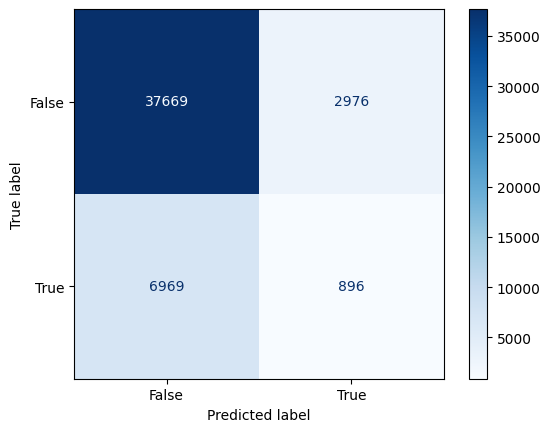

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf_classifier.fit(X_train_class, Y_train_class)
cm = confusion_matrix(Y_test_class, rf_classifier.predict(X_test_class))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_) # Assuming rf_classifier has classes_ attribute
disp.plot(cmap='Blues')
plt.show()

In [95]:
ol;inew_data = pd.DataFrame({
    'overs_bowled': [10.2],
    'wickets_lost': [2],
    'run_rate': [7.5],
    'powerplay': [45]
})

predicted_runs = best_rf_regressor.predict(new_data)
print(f"Predicted Cumulative Runs: {predicted_runs[0]}")

Predicted Cumulative Runs: 66.52452830188679


In [96]:
new_data_class = pd.DataFrame({
    'batsman1_name_encoded': [123],
    'run_rate': [6.8],
    'powerplay': [1],
    'overs_bowled': [8.3]
})

boundary_prediction = best_rf_classifier.predict(new_data_class)
print(f"Boundary Prediction (1=Yes, 0=No): {boundary_prediction[0]}")

Boundary Prediction (1=Yes, 0=No): False
